In [380]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy import stats
from warnings import filterwarnings
import pprint
from sklearn.preprocessing import StandardScaler
from scipy.stats import skew

In [381]:
filterwarnings(action='ignore')

## Loading datasets and getting some info

In [417]:
train_df = pd.read_csv('dataset/train.csv')
test_df = pd.read_csv('dataset/test.csv')

In [418]:
submission = pd.read_csv('dataset/test.csv')

In [419]:
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [420]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [421]:
# seperating categorical features from non-categoricals

categoricals = train_df.dtypes[train_df.dtypes == 'object'].index
non_categoricals = train_df.dtypes[train_df.dtypes != 'object'].index

print('Categoricals: ', categoricals)
print('\n Non-Categoricals: ', non_categoricals)

Categoricals:  Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

 Non-Categoricals:  Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',

## Finding and handling missing values

In [422]:
nums = train_df.isna().sum().sort_values(ascending=False)
percent = train_df.isna().sum()/train_df.isna().count().sort_values(ascending=False)
missings = pd.concat([nums, percent], axis=1, keys=['Total', 'Percent'])

missings[missings['Total'] != 0]

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479


According to data description, NaNs in some features doesn't mean that the data is missing, it means None: Fence -> Nan means no_fence

In [423]:
trap_missings = ['Fence', 'PoolQC', 'Alley', 'FireplaceQu',
                 'GarageFinish', 'GarageType', 'GarageQual',
                 'GarageCond', 'MiscFeature', 'BsmtFinType2',
                 'BsmtFinType1', 'BsmtExposure', 'BsmtCond',
                 'BsmtQual', 'MasVnrType']

for col in trap_missings:
    train_df[col].fillna('None', inplace=True)

In [424]:
# Numerical

train_df['LotFrontage'].fillna(train_df['LotFrontage'].mean(), inplace=True)
train_df['GarageYrBlt'].fillna(train_df['GarageYrBlt'].mean(), inplace=True)
train_df['MasVnrArea'].fillna(train_df['MasVnrArea'].mean(), inplace=True)

In [425]:
# Categorical

train_df.groupby('Electrical')['Electrical'].count().sort_values(ascending=False)

Electrical
SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [426]:
train_df['Electrical'].fillna('SBrkr', inplace=True)

In [427]:
nums = train_df.isna().sum().sort_values(ascending=False)
percent = train_df.isna().sum()/train_df.isna().count().sort_values(ascending=False)
missings = pd.concat([nums, percent], axis=1, keys=['Total', 'Percent'])

missings[missings['Total'] != 0]

,Total,Percent


All clean!

## Outliers

In [428]:
non_categoricals = non_categoricals.drop(['Id', 'SalePrice'])

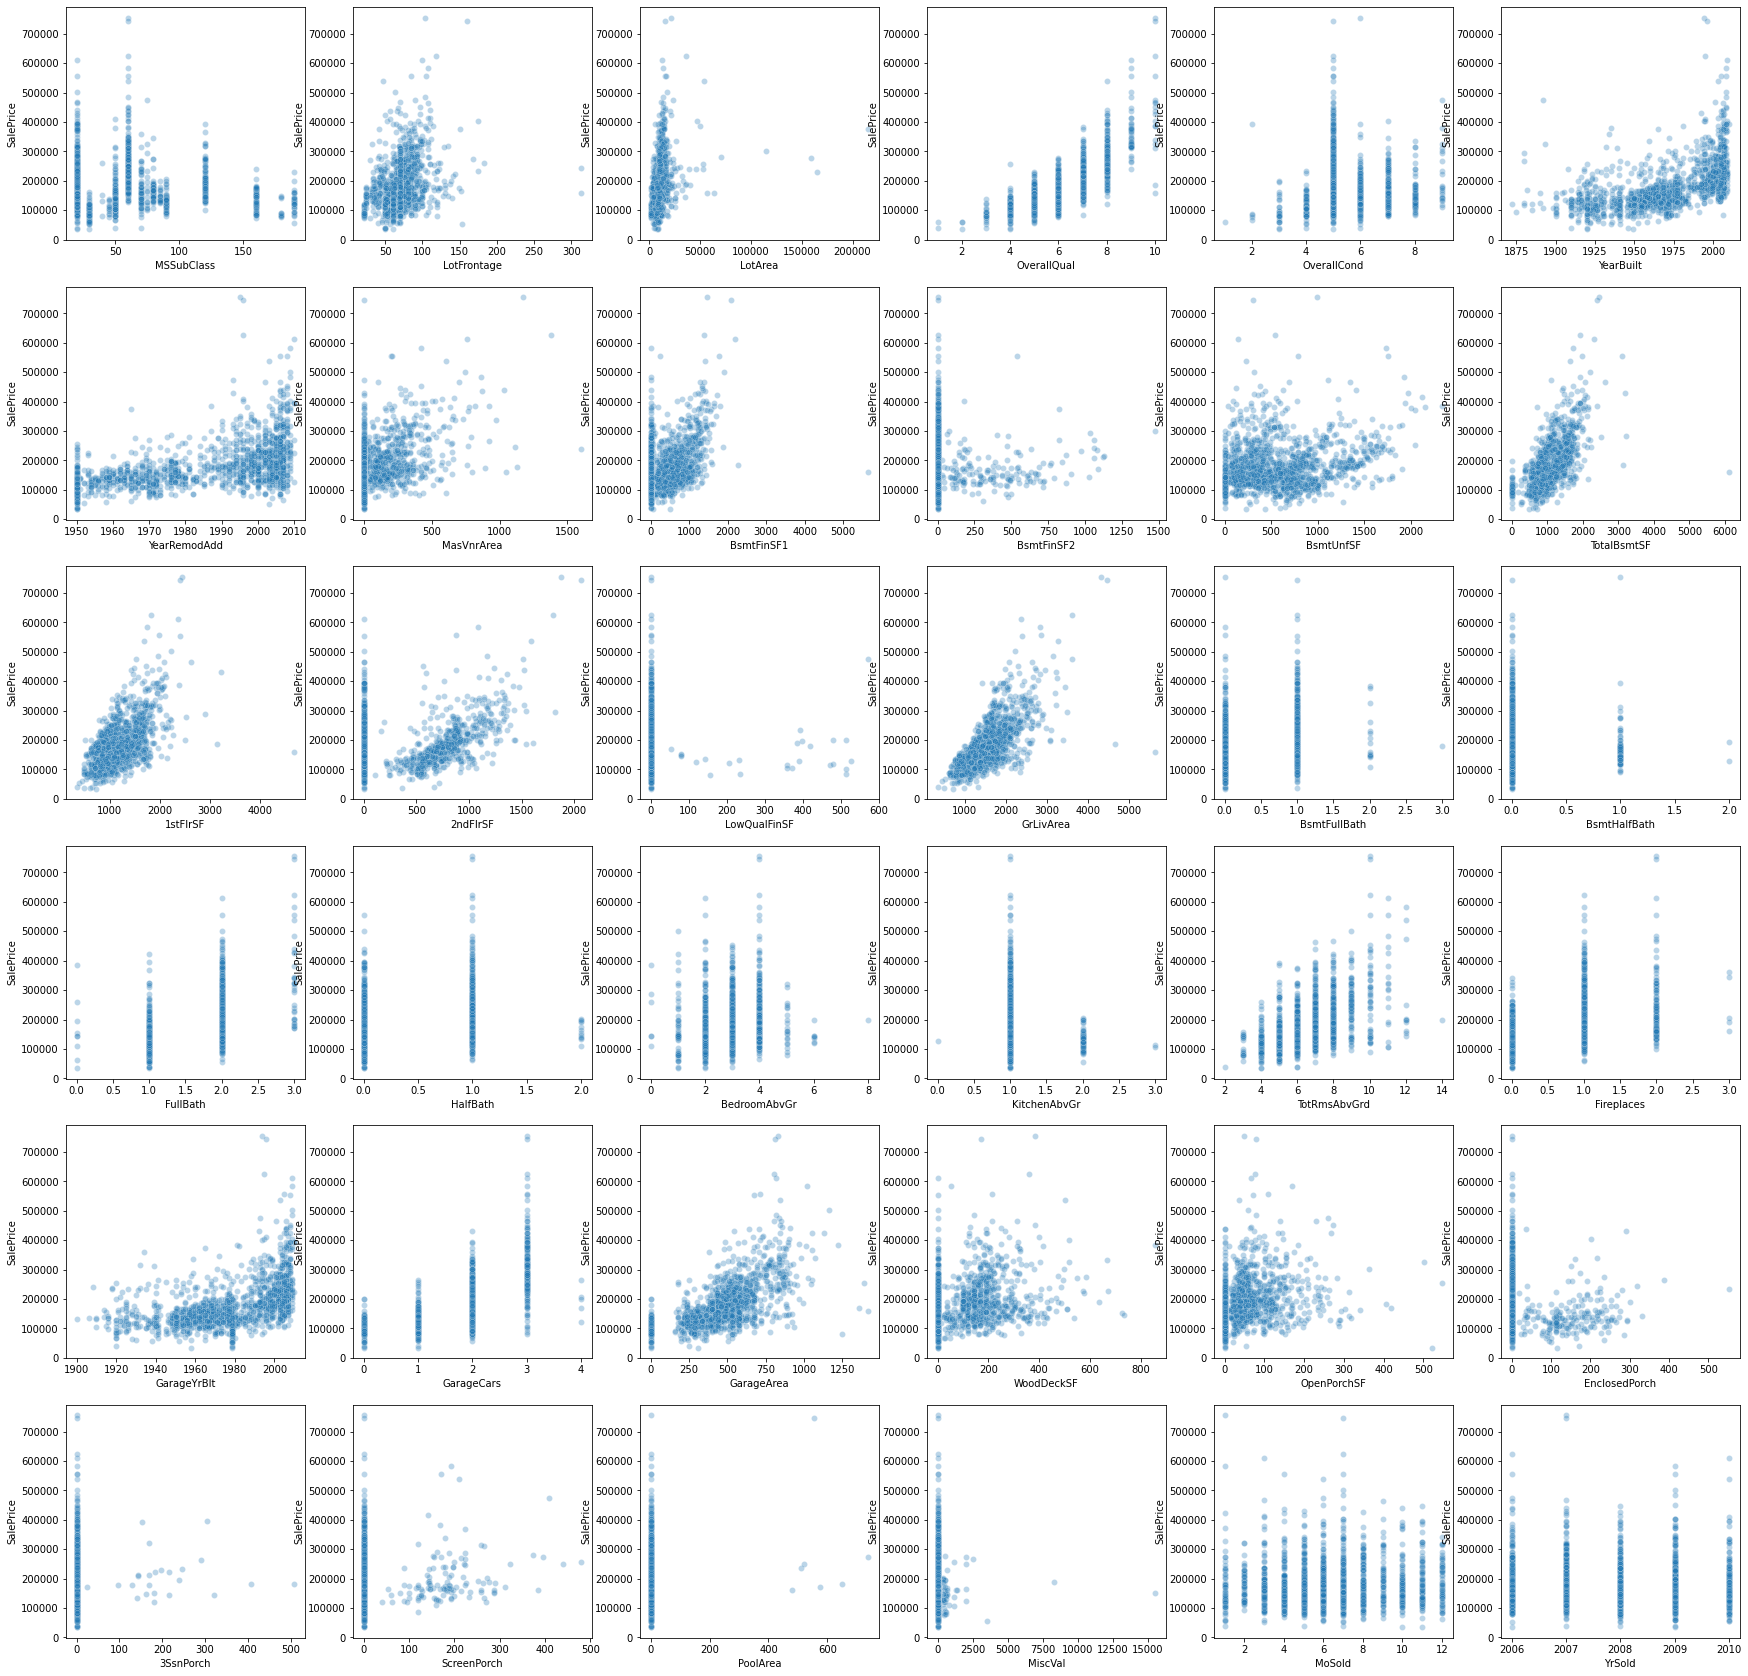

In [429]:
fig, axes = plt.subplots(6, 6, figsize=(30, 30))

for col, ax in zip(non_categoricals, axes.flatten()):
    sns.scatterplot(train_df[col], y=train_df['SalePrice'], ax=ax, alpha=0.3)

In [430]:
train_df = train_df.drop(train_df[train_df['GrLivArea']>5000].index)
train_df = train_df.drop(train_df[train_df['LotArea']>200000].index)
train_df = train_df.drop(train_df[train_df['TotalBsmtSF']>4000].index)
train_df = train_df.drop(train_df[train_df['LotFrontage']>200].index)
train_df = train_df.drop(train_df[train_df['1stFlrSF']>4000].index)

## Normalization

In [431]:
skewness = train_df[non_categoricals].skew()
high_skew = skewness[skewness > 0.5].sort_values(ascending=False)
high_skew

MiscVal          24.451726
PoolArea         15.943422
LotArea          10.841582
3SsnPorch        10.293487
LowQualFinSF      9.001760
KitchenAbvGr      4.483125
BsmtFinSF2        4.285575
ScreenPorch       4.117285
BsmtHalfBath      4.098469
EnclosedPorch     3.085809
MasVnrArea        2.683026
OpenPorchSF       2.367976
WoodDeckSF        1.541890
MSSubClass        1.405893
GrLivArea         1.124101
1stFlrSF          0.954121
BsmtUnfSF         0.918156
2ndFlrSF          0.813300
BsmtFinSF1        0.794654
LotFrontage       0.738988
OverallCond       0.693162
HalfBath          0.675786
TotRmsAbvGrd      0.668209
Fireplaces        0.632378
BsmtFullBath      0.582534
TotalBsmtSF       0.569997
dtype: float64

<AxesSubplot:title={'center':'After Normalization'}, xlabel='SalePrice', ylabel='Density'>

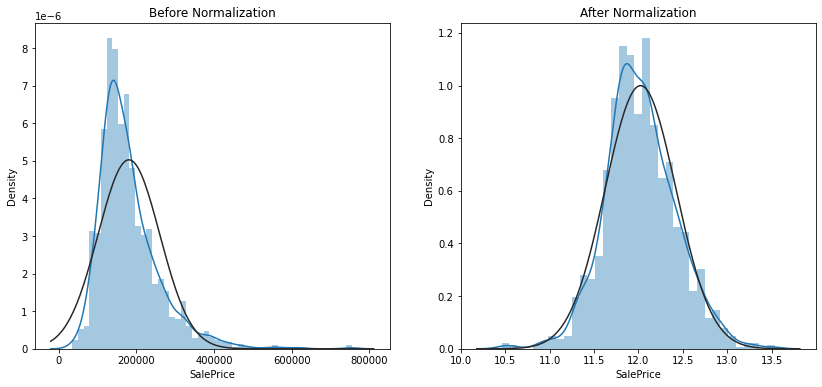

In [432]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14,6))

sns.distplot(train_df['SalePrice'], fit=stats.norm, ax=ax[0])
ax[0].set_title('Before Normalization')

train_df['SalePrice'] = np.log(train_df['SalePrice'])
ax[1].set_title('After Normalization')
sns.distplot(train_df['SalePrice'], fit=stats.norm, ax=ax[1])

<AxesSubplot:title={'center':'After Normalization'}, xlabel='LotArea', ylabel='Density'>

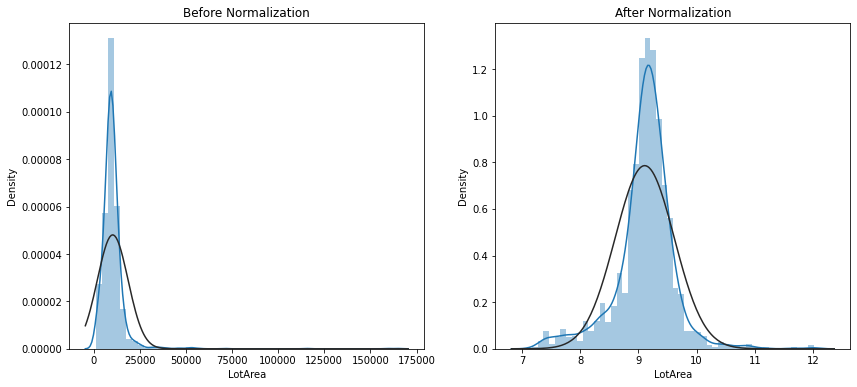

In [433]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14,6))

sns.distplot(train_df['LotArea'], fit=stats.norm, ax=ax[0])
ax[0].set_title('Before Normalization')

train_df['LotArea'] = np.log(train_df['LotArea'])
ax[1].set_title('After Normalization')
sns.distplot(train_df['LotArea'], fit=stats.norm, ax=ax[1])

<AxesSubplot:title={'center':'After Normalization'}, xlabel='GrLivArea', ylabel='Density'>

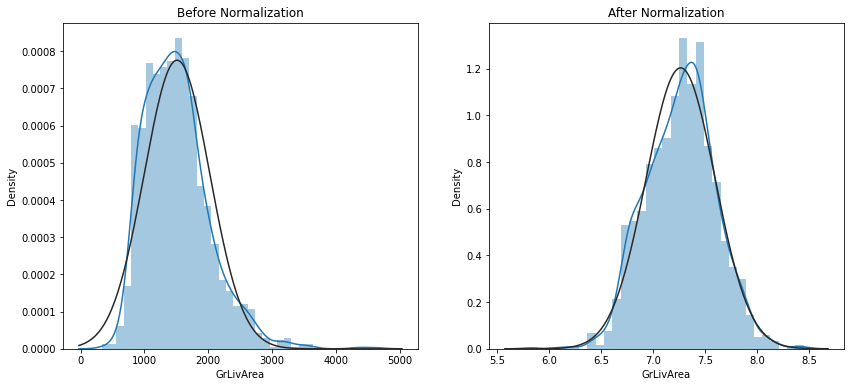

In [434]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14,6))

sns.distplot(train_df['GrLivArea'], fit=stats.norm, ax=ax[0])
ax[0].set_title('Before Normalization')

train_df['GrLivArea'] = np.log(train_df['GrLivArea'])
ax[1].set_title('After Normalization')
sns.distplot(train_df['GrLivArea'], fit=stats.norm, ax=ax[1])

## Feature importance

<AxesSubplot:>

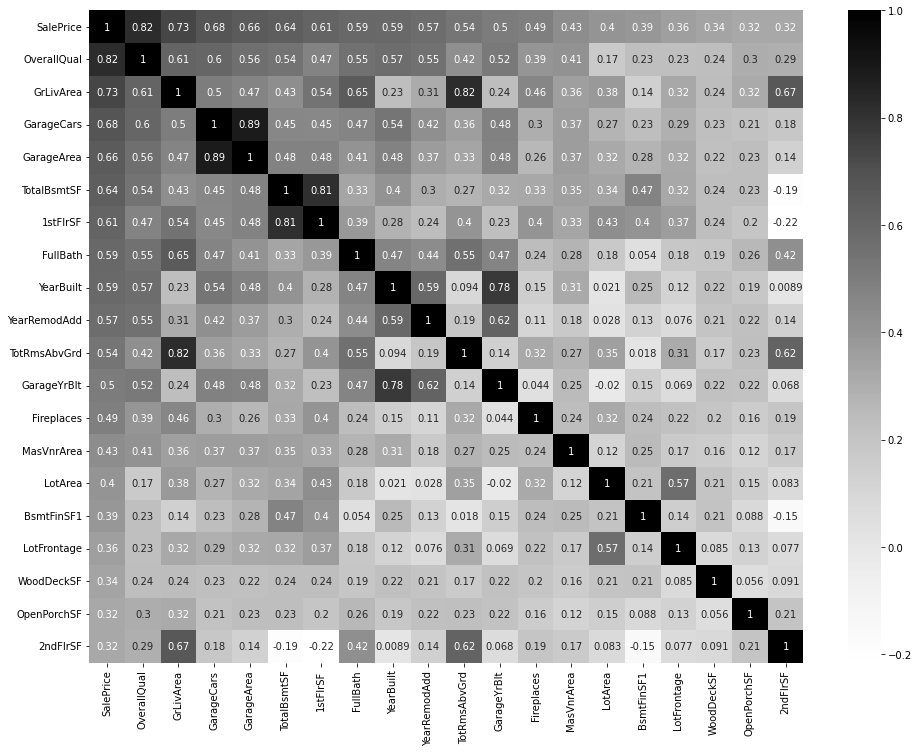

In [435]:
# getting the features which are highly correlated to SalePrice

cols = train_df.corr().nlargest(20, 'SalePrice')['SalePrice'].index

plt.figure(figsize=(16, 12))
sns.heatmap(train_df[cols].corr(), cmap='Greys', annot=True)

Based on heatmap which is shown above, these columns are highly correlated with the dependent column which is SalePrice.
There are some other information that we can extract from this heatmap: <br>
GarageArea and GarageCars, GarageYrBlt and MasVnrArea and Fireplaces, TotalBsmtSF and 1stFlrSf have the same effect on producing SalePrice; so we can drop one per each pair. (actually they're highly correlated to each other so that makes sense)

In [436]:
train_df[categoricals]

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
1,RL,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
2,RL,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
3,RL,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,None,None,None,WD,Abnorml
4,RL,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
1456,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Attchd,Unf,TA,TA,Y,None,MnPrv,None,WD,Normal
1457,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,Attchd,RFn,TA,TA,Y,None,GdPrv,Shed,WD,Normal
1458,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,None,None,None,WD,Normal


### Creating new features of some categorical features to see their impact on correlation

In [441]:
for col in trap_missings:
    if train_df[train_df[col] == 'None']:
        
        train_df['Has']

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,9.041922,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,12.247694
1,2,20,RL,80.0,9.169518,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,12.109011
2,3,60,RL,68.0,9.328123,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,12.317167
3,4,70,RL,60.0,9.164296,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,2,2006,WD,Abnorml,11.849398
4,5,60,RL,84.0,9.565214,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,12,2008,WD,Normal,12.429216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,8.976768,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,8,2007,WD,Normal,12.072541
1456,1457,20,RL,85.0,9.486076,Pave,None,Reg,Lvl,AllPub,...,0,None,MnPrv,None,0,2,2010,WD,Normal,12.254863
1457,1458,70,RL,66.0,9.109636,Pave,None,Reg,Lvl,AllPub,...,0,None,GdPrv,Shed,2500,5,2010,WD,Normal,12.493130
1458,1459,20,RL,68.0,9.181632,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,4,2010,WD,Normal,11.864462


## Outliers

In [ ]:
df['SalePrice'].mean()

In [379]:
df['SalePrice'].sort_values(ascending=False)

NameError: name 'df' is not defined

Some values are way different from the rest of values. The mean of SalePrice is something about 181000, but there are two values which are about 700000! we should find out the feature which is messing up the prices.

### Barplot

In [205]:
qualification = df[['SalePrice', 'OverallQual']].groupby(
    'OverallQual', as_index=False)['SalePrice'].mean()
qualification

,OverallQual,SalePrice
0,1,50150.000000
1,2,51770.333333
2,3,87473.750000
3,4,108420.655172
4,5,133523.347607
5,6,161603.034759
6,7,207716.423197
7,8,274735.535714
8,9,367513.023256
9,10,438588.388889


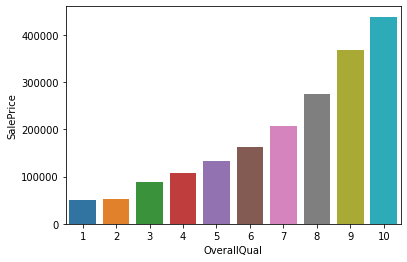

In [206]:
sns.barplot(x=qualification['OverallQual'], y=qualification['SalePrice'])
plt.show()

OverallQual has a really good effect on SalePrice, nice chosen features so far.



Based on what we just saw above, I decided to get rid of not only those two high sale prices, but also some of them which don't make sense.

### Dropping outliers

In [207]:
# indexes came from sorting values of SalePrice

df.drop(df.index[[691, 1182]], inplace=True)

In [208]:
# i consider those as outliers

df.drop(df[df['GrLivArea']>4000].index, inplace=True)

### Scatter plot for recognizing outliers

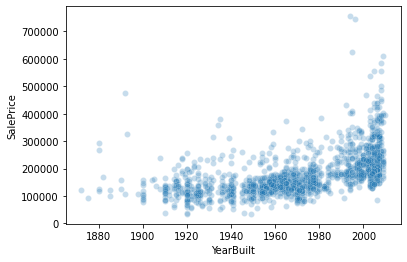

In [202]:
sns.scatterplot(x=df['YearBuilt'], y=df['SalePrice'], alpha=0.25)
plt.show()

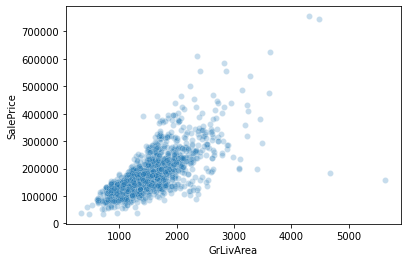

In [203]:
sns.scatterplot(x=df['GrLivArea'], y=df['SalePrice'], alpha=0.25)
plt.show()

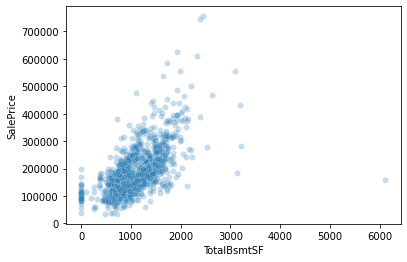

In [204]:
sns.scatterplot(x=df['TotalBsmtSF'], y=df['SalePrice'], alpha=0.25)
plt.show()

In [209]:
df.drop(df[df['TotalBsmtSF']>4000].index, inplace=True)

## Normalizing data

## Preparing data to train regression model

In [213]:
# checking if there are any duplicated values
print("num of duplicates: ", df.duplicated().sum(), "\n-------------------------")

# checking if there are any NaNs
print("num of NaNs:",'\n' ,df.isna().sum(), "\n-------------------------")

num of duplicates:  0 
-------------------------
num of NaNs: 
 SalePrice        0
OverallQual      0
GrLivArea        0
GarageArea       0
TotalBsmtSF      0
FullBath         0
TotRmsAbvGrd     0
YearBuilt        0
YearRemodAdd     0
GarageYrBlt     81
Id               0
dtype: int64 
-------------------------


In [214]:
df['GarageYrBlt'] = pd.to_numeric(df['GarageYrBlt'])

In [215]:
X = df.drop(['SalePrice'], axis=1)
y = df['SalePrice']

In [216]:
X_train, X_val, y_train, y_val = train_test_split(
    X, y, random_state=42, test_size=0.2)

In [217]:
imputer_yearbuilt = SimpleImputer(missing_values=np.nan, strategy='mean')
X_train[['GarageYrBlt']] = imputer_yearbuilt.fit(X_train[['GarageYrBlt']]).transform(X_train[['GarageYrBlt']])

In [218]:
imputer_yearbuilt = SimpleImputer(missing_values=np.nan, strategy='mean')
X_val[['GarageYrBlt']] = imputer_yearbuilt.fit(X_train[['GarageYrBlt']]).transform(X_val[['GarageYrBlt']])

## Standard Scaler

Standarization should be done after spliting the dataset. otherwise it may cause data leakage.

In [219]:
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
# # y_train = scaler.transform(y_train)
# # y_val = scaler.transform(y_val)

## Modeling

In [220]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR

In [221]:
lr = LinearRegression()
rf = RandomForestRegressor(random_state=42)
lgb = LGBMRegressor(random_state=42, objective='regression')
svr = SVR()

In [222]:
ensemble_regressor = VotingRegressor(
    [('lr', lr), ('rf', rf), ('lgb', lgb), ('svr', svr)])

In [223]:
for reg in (lr, rf, lgb, svr, ensemble_regressor):
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_val)
    print(reg.__class__.__name__, mean_squared_error(y_val, y_pred))

LinearRegression 0.026311540675647654
RandomForestRegressor 0.028747558698900225
LGBMRegressor 0.028582089209941958
SVR 0.0279652890023377
VotingRegressor 0.025518619529127654



## Predicting the test set

In [224]:
cols = df.columns
cols = cols.drop(['Id','SalePrice'])

In [225]:
submission = submission['Id']
X_test = test_df[cols]

In [226]:
X_test.isna().sum()

OverallQual      0
GrLivArea        0
GarageArea       1
TotalBsmtSF      1
FullBath         0
TotRmsAbvGrd     0
YearBuilt        0
YearRemodAdd     0
GarageYrBlt     78
dtype: int64

In [233]:
X_test['GarageYrBlt'] = pd.to_numeric(X_test['GarageYrBlt'])

In [238]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X_test[['GarageYrBlt']] = imputer.fit(X_train[['GarageYrBlt']]).transform(X_test[['GarageYrBlt']])
# X_test[['TotalBsmtSF']] = imputer.fit(X_train[['TotalBsmtSF']]).transform(X_test[['TotalBsmtSF']])
# X_test[['GarageArea']] = imputer.fit(X_train[['GarageArea']]).transform(X_test[['GarageArea']])

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [232]:
X_test

,OverallQual,GrLivArea,GarageArea,TotalBsmtSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,GarageYrBlt
0,5,896,730.0,882.0,1,5,1961,1961,1961.0
1,6,1329,312.0,1329.0,1,6,1958,1958,1958.0
2,5,1629,482.0,928.0,2,6,1997,1998,1997.0
3,6,1604,470.0,926.0,2,7,1998,1998,1998.0
4,8,1280,506.0,1280.0,2,5,1992,1992,1992.0
...,...,...,...,...,...,...,...,...,...
1454,4,1092,0.0,546.0,1,5,1970,1970,NaN
1455,4,1092,286.0,546.0,1,6,1970,1970,1970.0
1456,5,1224,576.0,1224.0,1,7,1960,1996,1960.0
1457,5,970,0.0,912.0,1,6,1992,1992,NaN


In [167]:
X_test = scaler.transform(X_test)

In [178]:
y_pred = np.expm1(ensemble_regressor.predict(X_test))